# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [15]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.reporting.figures import PortfolioPlot
from surfingcrypto.reporting.figures import CalendarPlot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
coins={
    "BTC":"",
    "ETH":"",
    "MATIC":"",
    "ADA":"",
    "SOL":""
}
c = Config(coins,"/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")


In [17]:
p = Portfolio("coinbase", configuration=c)



### PORTFOLIO 
MyCoinbase( isHistoric:True, N_accounts:32)
Warning! There are 16 transactionsthat were EXCLUDED in df.
Warning! Errors while handling transactions:
TransactionsHistory(Transactions:218 - Processed:218, Unhandled:0 - Errors:10)


In [18]:
p.coinbase.active_accounts


[]

In [19]:
p.df.tail()


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,transaction_id,transaction_type_id
datetime,,,,,,,,,,,
2022-05-10T06:31:30Z,buy,970.875285,MATIC,876.54,EUR,NaN,NaN,8.945,0.902835,fe6b04dd-2d31-50d5-8548-966a630deedd,5634ee32-3ef8-5950-97b3-05dc905d6314
2022-05-10T06:31:31Z,sell,943.650000,USDC,894.43,EUR,NaN,NaN,8.945,0.947841,fa17e257-8227-57a5-baa9-4f18d6e1d1f2,5634ee32-3ef8-5950-97b3-05dc905d6314
2022-05-11T14:28:32Z,buy,745.762861,USDC,707.81,EUR,NaN,NaN,9.160,0.949109,7202ea05-ee11-5f57-b467-d23435942770,48bacb71-d3fb-51ea-84f5-2a015c74d80e
2022-05-11T14:28:33Z,sell,970.875285,MATIC,726.13,EUR,NaN,NaN,9.160,0.747913,8be98c50-91f1-59f7-a0e3-d232c2f07bad,48bacb71-d3fb-51ea-84f5-2a015c74d80e
2022-05-11T19:36:54Z,sell,745.770000,USDC,690.95,EUR,690.95,701.4,10.450,0.940504,8ead5b6e-8b47-53d1-9136-33d007607011,4024cb0d-d9b0-5eba-a3a6-3c37069d3929


## Total fees

In [20]:
p.total_fees()


317.6700000000001

## Portfolio total investment`

Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [21]:
p.total_investment()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-726.91


## Portfolio value tracker

In [22]:
p.start_tracker(
    stocks_start="1-1-2021", benchmark="ETH",
)



The  `error_log` attributes contains the log from loading data.

In [23]:
p.tracker.error_log


[]

### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [24]:
p.tracker.closedata.tail()


,Date,Close,symbol
12988,2022-04-27 00:00:00+00:00,0.132365,DOGE
12989,2022-04-28 00:00:00+00:00,0.130776,DOGE
12990,2022-04-29 00:00:00+00:00,0.128064,DOGE
12991,2022-04-30 00:00:00+00:00,0.120980,DOGE
12992,2022-05-01 00:00:00+00:00,0.126030,DOGE


### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [25]:
p.tracker.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854,13eeda10-e6c0-51d6-a799-54a399840255
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921,576000a6-1904-5f54-97a3-ade4ccc9b916
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980,332111be-8e28-5611-bb83-cb007f24c2f6
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730,c1c24d9e-966c-5cf9-a0cc-b79a68dfcbcb


### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [26]:
p.tracker.daily_calcs

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,e07fd026-c7f2-56e9-990a-a1c5af3a6ba6,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2022-05-10 06:31:30+00:00,buy,970.875285,MATIC,876.54,0.902835,fe6b04dd-2d31-50d5-8548-966a630deedd,2022-05-10 00:00:00+00:00,0.845660,821.030604,2225.735405,2225.735405,0.393820,876.540000,-0.063328,-55.509396,0.000000,0.000000
1886,2022-05-11 14:28:32+00:00,buy,0.002088,USDC,707.81,0.949109,7202ea05-ee11-5f57-b467-d23435942770,2022-05-11 00:00:00+00:00,0.952025,0.001988,1971.188698,1971.188698,0.359078,707.810000,0.003072,0.000006,0.000000,0.000000
1887,2022-05-11 14:28:32+00:00,buy,0.002088,USDC,707.81,0.949109,7202ea05-ee11-5f57-b467-d23435942770,2022-05-12 00:00:00+00:00,0.964168,0.002013,1890.164211,1971.188698,0.359078,678.715910,0.015867,0.000031,-0.041104,-29.094090
1888,2022-05-11 14:28:32+00:00,buy,0.002088,USDC,707.81,0.949109,7202ea05-ee11-5f57-b467-d23435942770,2022-05-13 00:00:00+00:00,0.960773,0.002006,1934.727849,1971.188698,0.359078,694.717720,0.012290,0.000024,-0.018497,-13.092280


### Daily snapshots

The module produces daily snapshots of the portfolio balance.
Each day can be accessed by selecting via the `Date Snapshot` column.

Either select a specifici day by specifing it with a string in `d-m-Y` forma or use `last` to get the last available snapshot.


In [27]:
p.tracker.daily_snaphost("last")


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
Date Snapshot,,,,,,,,,,,,,,,,,
2022-05-14 00:00:00+00:00,2022-05-11 14:28:32+00:00,buy,0.002088,USDC,707.81,0.949109,7202ea05-ee11-5f57-b467-d23435942770,0.960806,0.002006,1974.927719,1971.188698,0.359078,709.152599,0.012324,0.000024,0.001897,1.342599


### Live snapshots

Get the live snapshot of the portfolio.

At the moment it does not feature updating benchmark calcs.


In [38]:
p.live_snapshot()

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,transaction_id,Symbol Adj Close,Adj cost daily,symbol Return,Stock Gain / (Loss)
Date Snapshot,,,,,,,,,,,
2022-05-14 00:00:00+00:00,2022-05-11 14:28:32+00:00,buy,0.002088,USDC,707.81,0.949109,7202ea05-ee11-5f57-b467-d23435942770,0.960347,0.002005,0.011841,0.000023


### Daily grouped metrics

The `daily_grouped_metrics()` method can be used to extract from the `daily_calcs` dataframe a single grouped timeseries of a selecred set of variables.

In [29]:
p.tracker.daily_grouped_metrics(["Adj cost daily"]).tail()



variable,Adj cost daily
Date Snapshot,
2022-05-10,821.039366
2022-05-11,0.001988
2022-05-12,0.002013
2022-05-13,0.002006
2022-05-14,0.002006


By default all different assets are summed together, otherwise it is possible to keep data separated by simbol, with `by_simbol` set as `True`.

In [30]:
p.tracker.daily_grouped_metrics(["Adj cost daily"], by_symbol=True).iloc[-5:].dropna(
    axis=1
)



Symbol,USDC
variable,Adj cost daily
Date Snapshot,
2022-05-10,0.008762
2022-05-11,0.001988
2022-05-12,0.002013
2022-05-13,0.002006
2022-05-14,0.002006


Since `variables` is a list, we can compare multiple attributes.

In [31]:
df = p.tracker.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)", "Stock Gain / (Loss)"], by_symbol=True
)
df.tail()


Symbol                           AAVE                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                            ACH                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                            ADA                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                           ALGO                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                            AMP                      ...  \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-05-10                        NaN                 NaN  ...   
2022-05-11                        NaN                 NaN  ...   
2022-05-12                        NaN                 NaN  ...   
2022-05-13                        NaN                 NaN  ...   
2022-05-14                        NaN                 NaN  ...   

Symbol                            SOL                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                          SUSHI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                            UNI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-05-10                        NaN                 NaN   
2022-05-11                        NaN                 NaN   
2022-05-12                        NaN                 NaN   
2022-05-13                        NaN                 NaN   
2022-05-14                        NaN                 NaN   

Symbol                           USDC           

## Portfolio figures

The `surfingcrypto.reporting.figures` modules containes a custom `PortfolioPlot` class that is designed to plot figures for the stock calculation, as *Adj cost daily*  or *Stock Gain / (Loss)*.

Data can be selected by passing the `variable` - and optionally `by_symbol`-  as to a `daily_grouped_metrics()` function. 

Moreover, with `zero_line`as `True` it is possible to add an horizontal line at 0.
### Portfolio daily value 

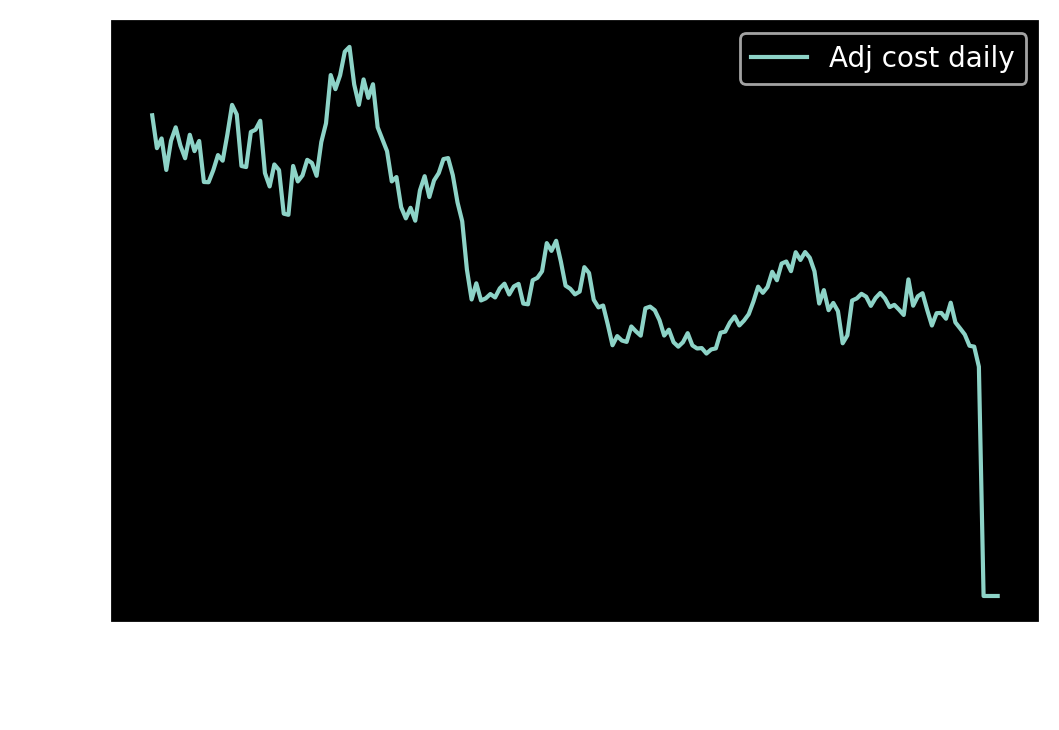

In [32]:
PortfolioPlot(variables=["Adj cost daily"], object=p, graphstart="6m")



### Portfolio gain/loss

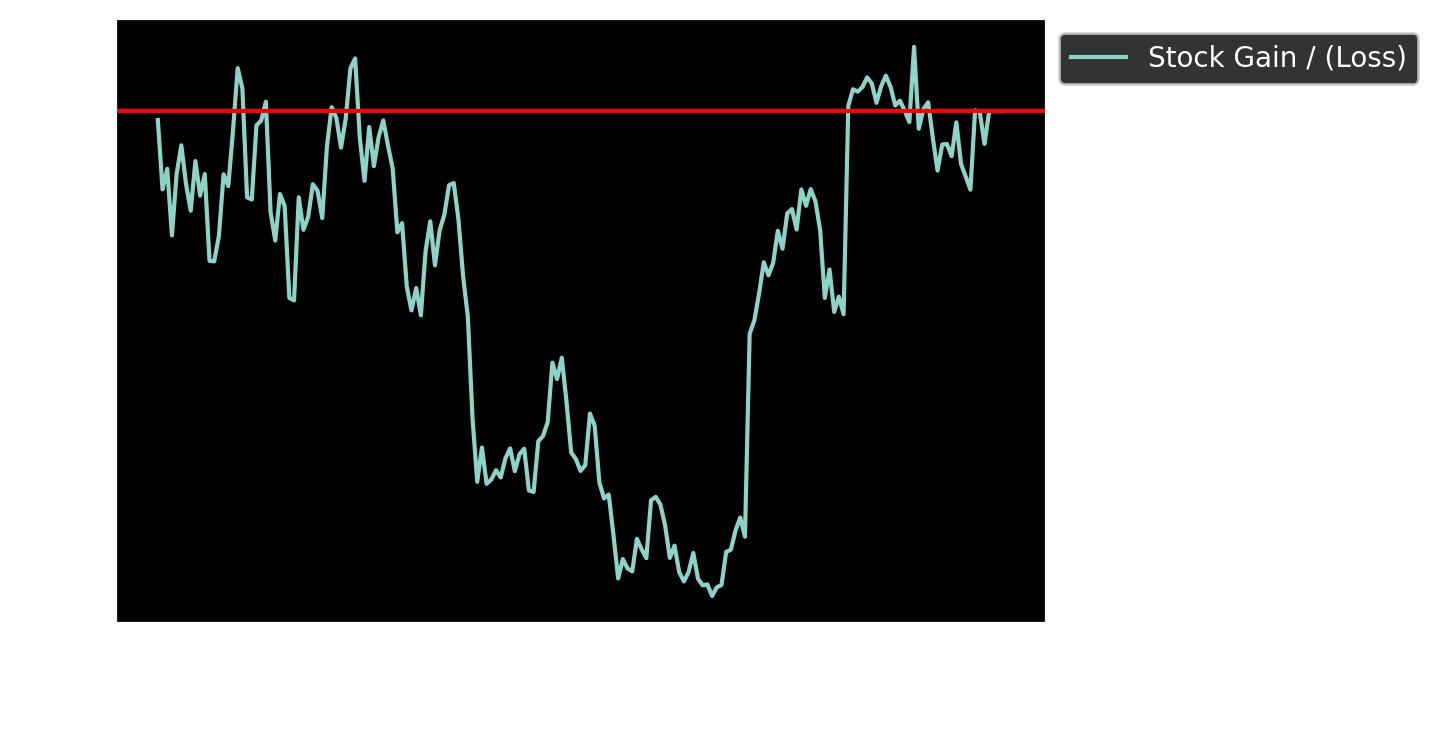

In [33]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



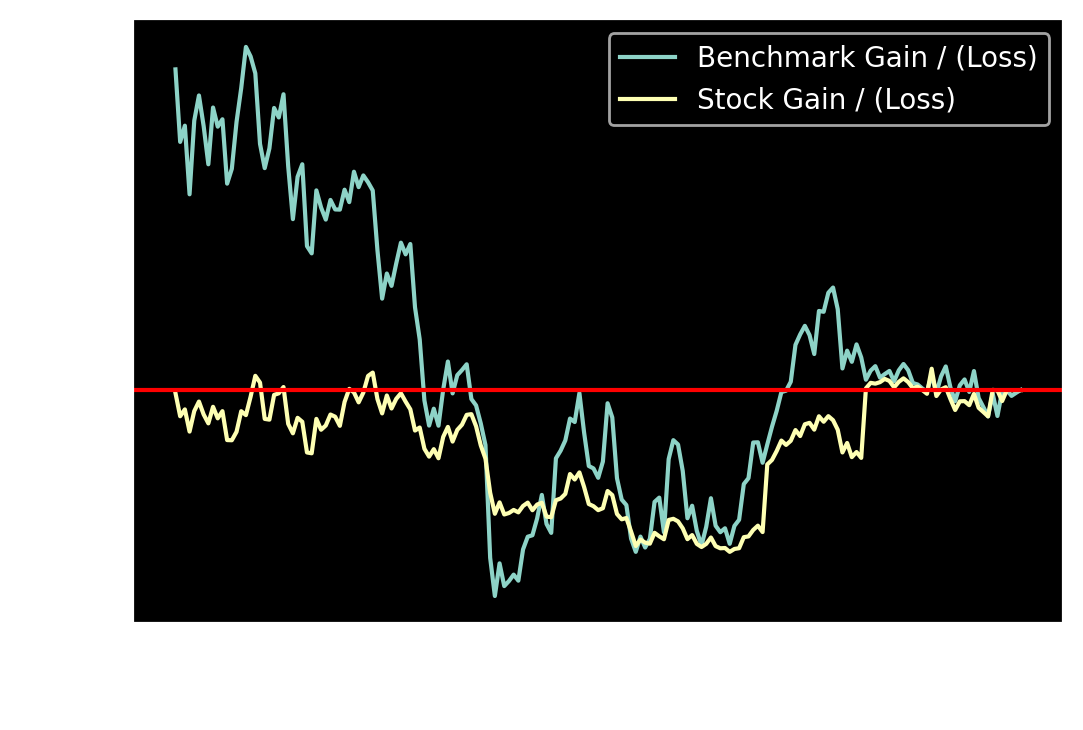

In [34]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)", "Benchmark Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



### Portfolio daily value by symbol


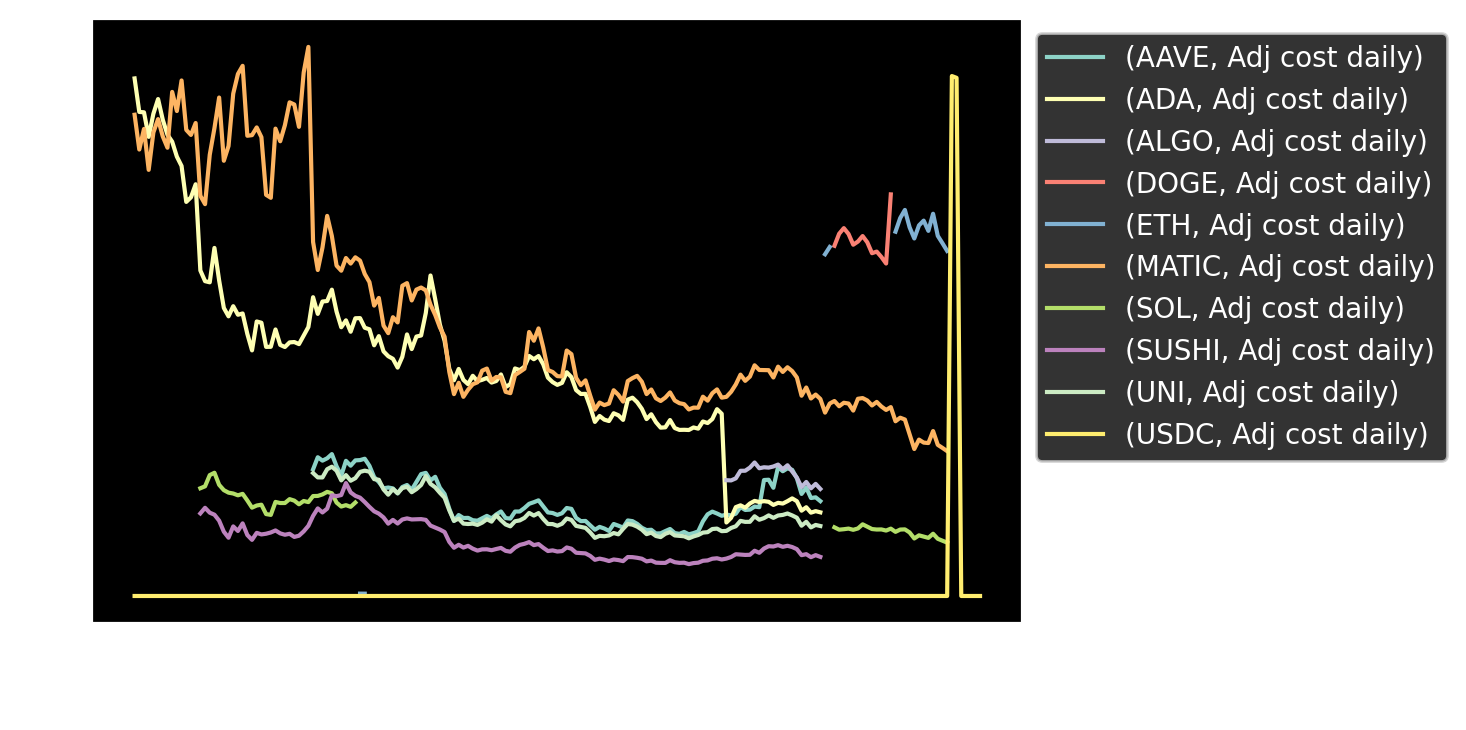

In [35]:
PortfolioPlot(
    variables=["Adj cost daily"], by_symbol=True, object=p, graphstart="6m"
)



### Stock gain by symbol

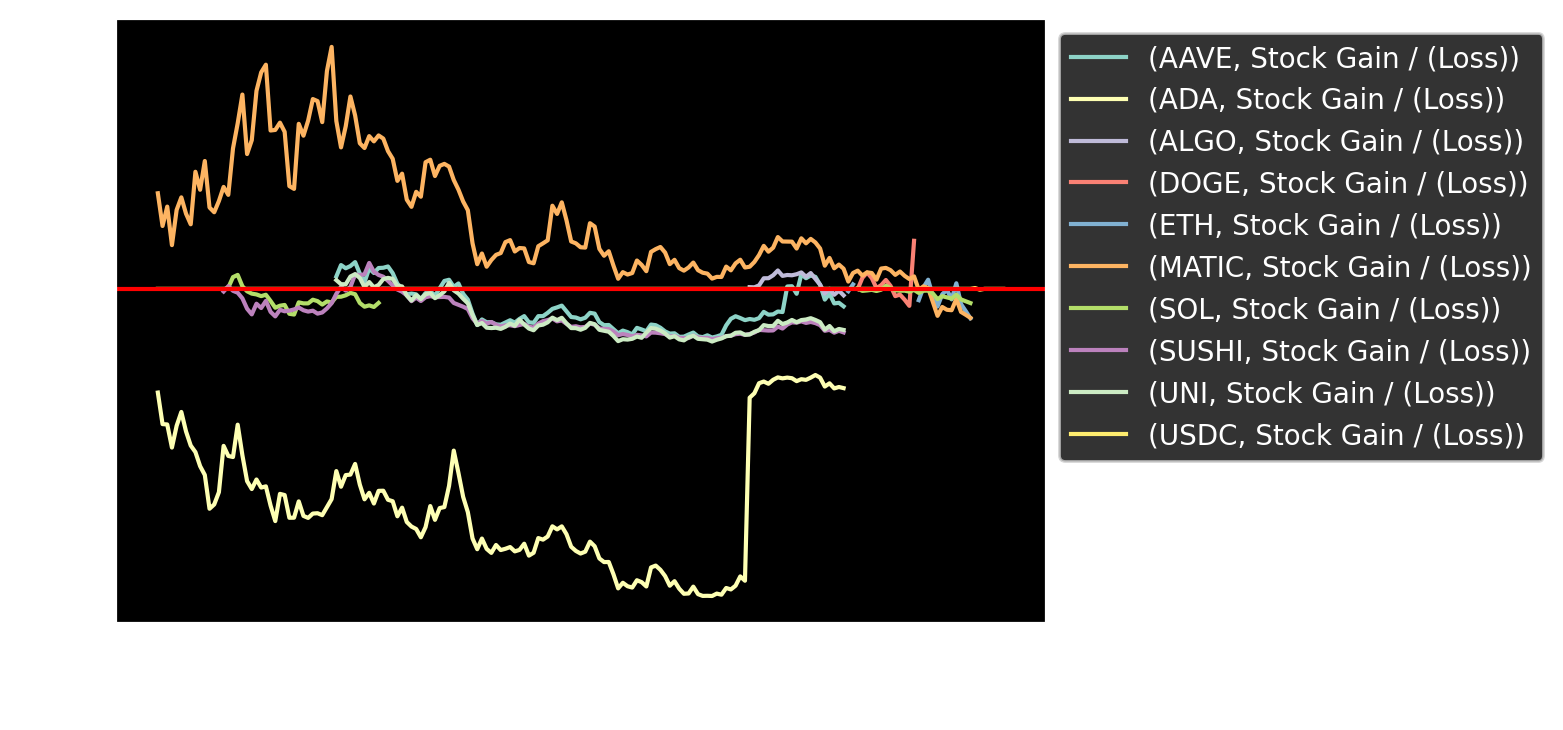

In [36]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    by_symbol=True,
    zero_line=True,
    object=p,
    graphstart="6m",
)


## Calendar plot

This calendar plot is a good visualisation of a variable in a calendar style.

The series passed as input must have a datetime index.


In [40]:
import pandas as pd

In [41]:
values = p.tracker.daily_grouped_metrics(["Stock Gain / (Loss)"])
values.index = pd.to_datetime(values.index)
values = values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-05-10,-55.509381
2022-05-11,0.000006
2022-05-12,0.000031


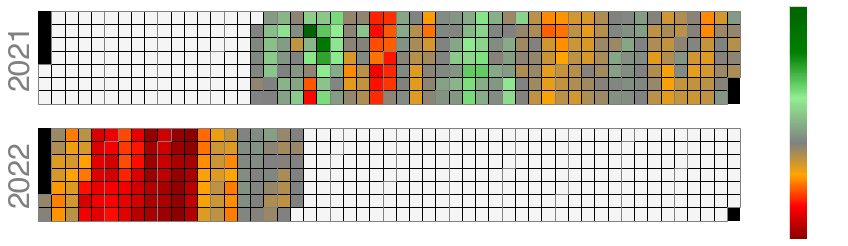

In [42]:
import pandas as pd
CalendarPlot(values=values)